- 首先我们导入所需的库和模块。其中, numpy用于处理数值数据, pandas用于处理数据集, matplotlib用于绘图, sklearn.datasets用于加载波士顿房屋数据集, sklearn.model_selection用于划分训练集和测试集, sklearn.ensemble用于实现随机森林回归模型, sklearn.metrics用于评估模型性能。

- 然后，我们加载波士顿房屋数据集，并将其划分为特征变量X和目标变量y。

- 接下来，我们将数据集划分为训练集和测试集，其中20%的数据将用作测试集。

- 初始化RandomForestRegressor类，设置n_estimators参数为100，即使用100棵决策树构建随机森林回归模型。

- 在训练集上拟合随机森林回归模型。

- 在测试集上进行预测，得到预测结果y_pred。

- 使用均方误差（Mean Squared Error，MSE）评估模型的性能，MSE值越小，表示预测效果越好。同时，我们还计算了均方根误差（Root Mean Squared Error，RMSE）。

- 最后，我们绘制了特征的重要性图，根据特征的重要性来评估和解释模型的预测能力。越接近1的特征对目标变量的贡献越大。

https://www.ml-zhuang.club/4848/228/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [10]:
# 加载波士顿房屋数据集
boston_df = pd.read_csv('./data/1_boston_housing.csv')

# 分离特征和目标变量 
X = boston_df.drop('TARGET', axis=1)
y = boston_df['TARGET']

# 2. 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 3. 初始化随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 4. 在训练集上拟合模型
rf.fit(X_train, y_train)

# 5. 在测试集上进行预测
y_pred = rf.predict(X_test)


In [12]:
# 6. 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 7.90
Root Mean Squared Error: 2.81


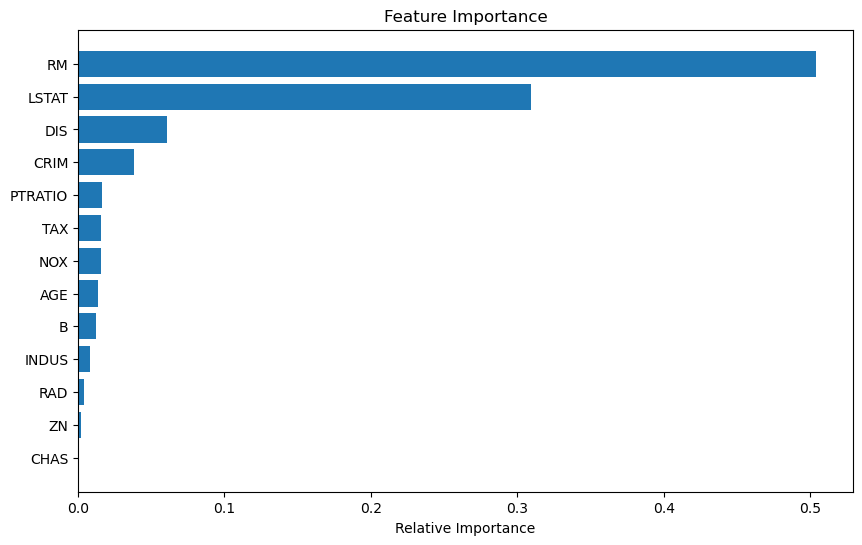

In [13]:
# 显示特征的重要性
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()